In [89]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
dataframe=pd.read_csv("../Data/playerstats.csv",sep=',', header=1)
dataframe

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches
0,1,Luis Abram\1f462f95,pe PER,DF,Granada,25-323,1996.0,8,6,560,...,0.5,0.5,0.0,0.5,0.08,0.00,0.08,0.08,0.08,Matches
1,2,Marcos Acuña\81442ecb,ar ARG,DF,Sevilla,30-080,1991.0,17,13,1175,...,1.0,1.0,1.8,2.8,0.08,0.14,0.21,0.08,0.21,Matches
2,3,Martin Agirregabiria\355c883a,es ESP,DF,Alavés,25-251,1996.0,15,13,1224,...,0.1,0.1,0.9,1.0,0.01,0.07,0.07,0.01,0.07,Matches
3,4,Julen Agirrezabala\a2c1a8d3,es ESP,GK,Athletic Club,21-021,2000.0,4,4,360,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Sergio Agüero\4d034881,ar ARG,FW,Barcelona,33-228,1988.0,4,2,151,...,1.1,1.1,0.3,1.3,0.64,0.16,0.80,0.64,0.80,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,Joseba Zaldúa\5ca20b7a,es ESP,DF,Real Sociedad,29-206,1992.0,13,8,683,...,0.0,0.0,0.3,0.3,0.00,0.04,0.04,0.00,0.04,Matches
537,538,Oier Zarraga\968a1c2f,es ESP,MF,Athletic Club,23-012,1999.0,16,4,603,...,0.4,0.4,0.2,0.6,0.06,0.03,0.08,0.06,0.08,Matches
538,539,Luca Zidane\c818c4d9,fr FRA,GKMF,Rayo Vallecano,23-248,1998.0,3,3,195,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
539,540,Igor Zubeldia\5c7845f6,es ESP,DFMF,Real Sociedad,24-292,1997.0,12,7,657,...,0.4,0.4,0.0,0.4,0.06,0.00,0.06,0.06,0.06,Matches


In [91]:
#cleaning the data
for i, row in dataframe.iterrows():
    dataframe.at[i,'Age']=str(dataframe.at[i,'Age'])
    ifor_val=dataframe.at[i,'Age'].split("-",1)
    dataframe.at[i,'Age']=ifor_val[0]
    dataframe.at[i,'Age']=float(dataframe.at[i,'Age'])
for i, row in dataframe.iterrows():
    ifor_val=dataframe.at[i,'Player'].split("\\",1)
    dataframe.at[i,'Player']=ifor_val[0]

In [98]:
selectedData = dataframe.filter(['Player','Age','90s', 'xG','xA'], axis=1)
selectedData

,Player,Age,90s,xG,xA
0,Luis Abram,25.0,6.2,0.5,0.0
1,Marcos Acuña,30.0,13.1,1.0,1.8
2,Martin Agirregabiria,25.0,13.6,0.1,0.9
3,Julen Agirrezabala,21.0,4.0,0.0,0.0
4,Sergio Agüero,33.0,1.7,1.1,0.3
...,...,...,...,...,...
536,Joseba Zaldúa,29.0,7.6,0.0,0.3
537,Oier Zarraga,23.0,6.7,0.4,0.2
538,Luca Zidane,23.0,2.2,0.0,0.0
539,Igor Zubeldia,24.0,7.3,0.4,0.0


In [105]:
selectedData = selectedData[selectedData['xA'] > 1]
selectedData = selectedData[selectedData['xG'] > 1]
selectedData = selectedData[selectedData['Age']< 26]
selectedData

,Player,Age,90s,xG,xA
34,Marco Asensio,25.0,10.0,3.8,1.3
67,Lucas Boyé,25.0,12.8,3.4,1.2
109,Santi Comesaña,25.0,16.3,2.1,1.6
128,Sergiño Dest,21.0,10.7,1.5,2.7
129,Boulaye Dia,25.0,9.7,4.4,1.3
147,Youssef En-Nesyri,24.0,5.2,3.0,1.2
171,Jorge de Frutos,24.0,13.3,4.1,2.0
189,Maxi Gómez,25.0,12.4,2.5,1.8
196,Nicolás González,20.0,10.1,1.4,1.2
209,Gonçalo Guedes,25.0,17.1,4.5,2.7


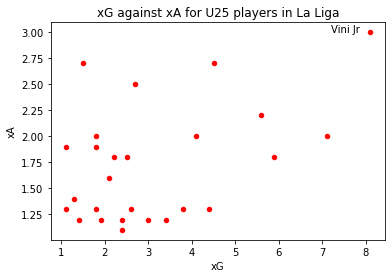

In [112]:
selectedData.plot(kind='scatter',x='xG',y='xA',color='red')
plt.title('xG against xA for U25 players in La Liga')
plt.text(7.2,3,'Vini Jr')
plt.show()